len(samples): 3439
len(set(labels)): 46
train_Y
Number 37: 80, Number 17: 62, Number 30: 78, Number 38: 79, Number 26: 81, Number 32: 67, Number 25: 48, Number 7: 58, Number 11: 42, Number 24: 74, Number 36: 75, Number 35: 75, Number 41: 64, Number 1: 81, Number 8: 75, Number 13: 82, Number 34: 71, Number 14: 53, Number 40: 64, Number 45: 77, Number 28: 40, Number 20: 64, Number 0: 55, Number 2: 56, Number 29: 75, Number 22: 32, Number 6: 52, Number 39: 62, Number 19: 44, Number 21: 41, Number 4: 62, Number 3: 63, Number 44: 83, Number 27: 44, Number 12: 38, Number 16: 61, Number 5: 69, Number 9: 60, Number 10: 51, Number 18: 58, Number 15: 25, Number 43: 49, Number 31: 72, Number 42: 58, Number 33: 45, Number 23: 6
test_Y
Number 3: 18, Number 16: 14, Number 18: 18, Number 36: 14, Number 29: 21, Number 30: 22, Number 38: 18, Number 40: 17, Number 6: 15, Number 14: 23, Number 24: 15, Number 33: 12, Number 41: 16, Number 15: 12, Number 39: 7, Number 8: 24, Number 26: 15, Number 5: 22, Nu

Using cache found in /home/mambauser/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 1 0.47s: train loss 2.606349, train acc 0.305, test loss 1.579753, test acc 0.515
Epoch 2 0.40s: train loss 1.165064, train acc 0.642, test loss 1.028878, test acc 0.682
Epoch 3 0.40s: train loss 0.612981, train acc 0.806, test loss 0.842547, test acc 0.743
Epoch 4 0.40s: train loss 0.386701, train acc 0.885, test loss 0.640625, test acc 0.804
Epoch 5 0.40s: train loss 0.276330, train acc 0.915, test loss 0.537162, test acc 0.830
Epoch 6 0.40s: train loss 0.159563, train acc 0.953, test loss 0.588010, test acc 0.817
Epoch 7 0.40s: train loss 0.341353, train acc 0.900, test loss 0.700574, test acc 0.810
Epoch 8 0.40s: train loss 0.170139, train acc 0.949, test loss 0.436053, test acc 0.868
Epoch 9 0.40s: train loss 0.045638, train acc 0.989, test loss 0.328358, test acc 0.895
Epoch 10 0.40s: train loss 0.015823, train acc 0.997, test loss 0.346048, test acc 0.900
Epoch 11 0.40s: train loss 0.006537, train acc 1.000, test loss 0.305862, test acc 0.914
Epoch 12 0.40s: train loss 0.0

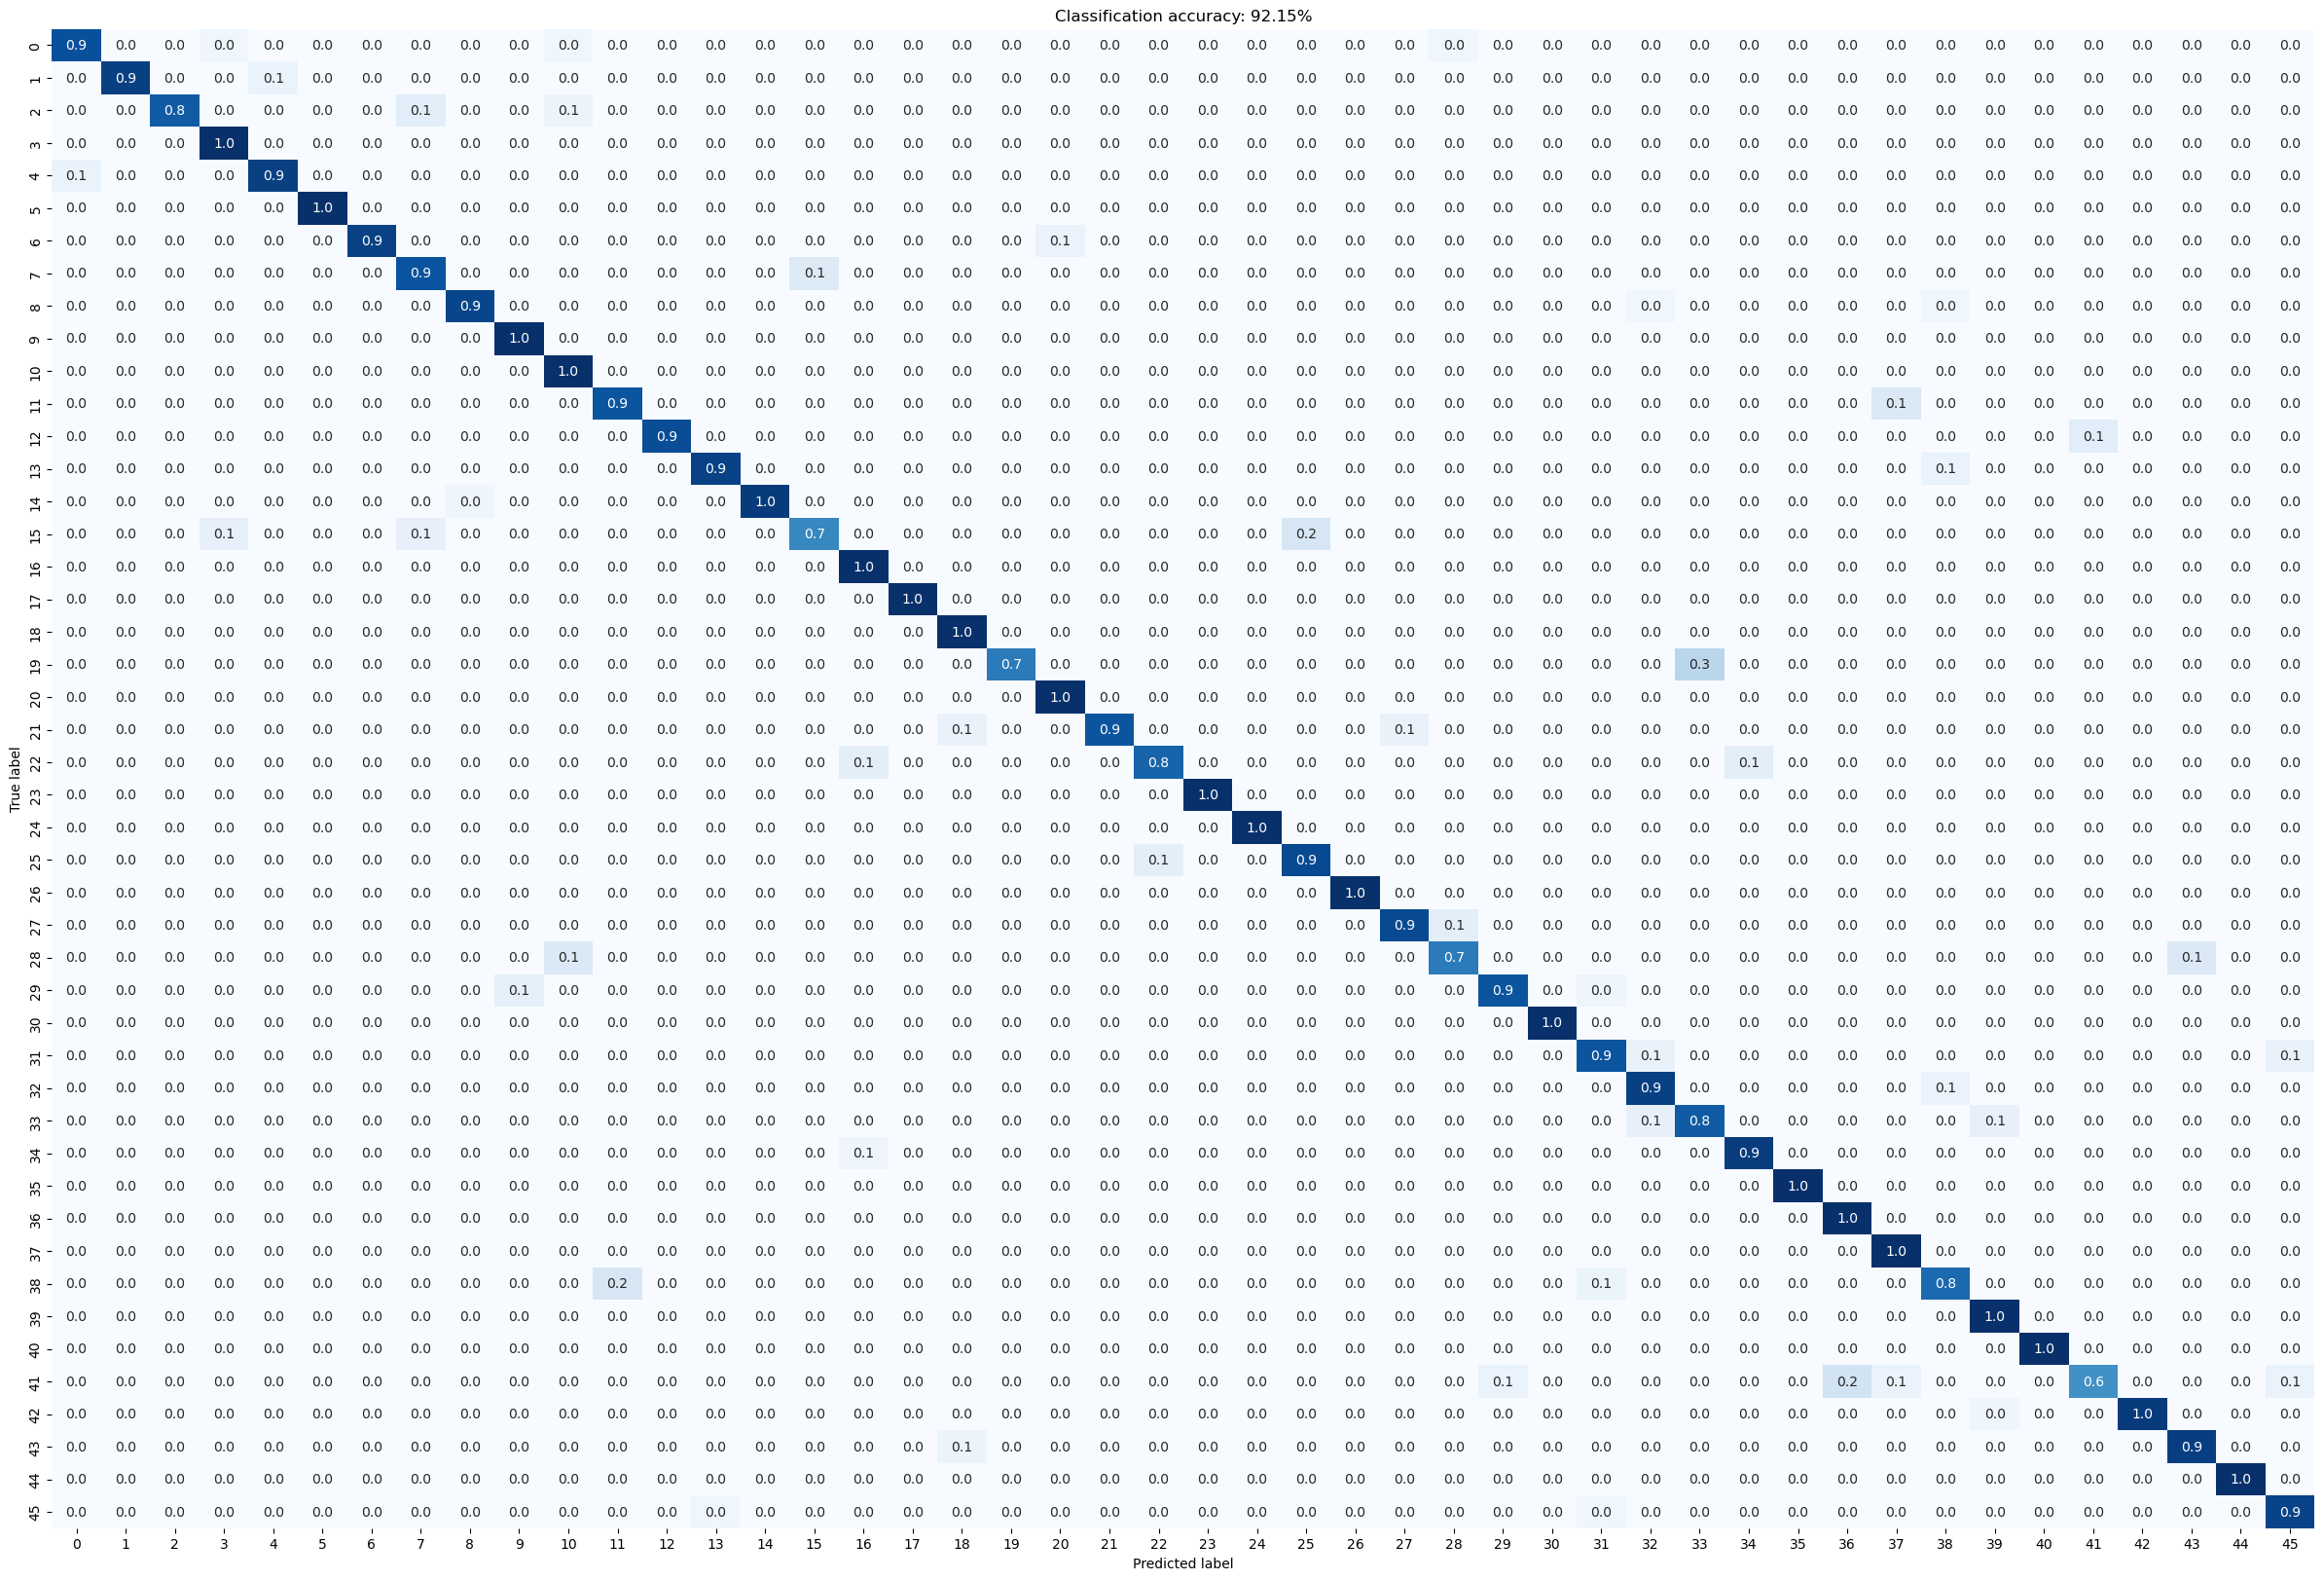

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

from MMClassifyFunc.train import Trainer
from MMClassifyFunc.models import CustomResNet
from MMClassifyFunc.data_preprocess import get_loader_hdf5
from MMClassifyFunc.data_read import get_data_hdf5_wly
from MMClassifyFunc.visualization import visualize_results, visualize_predict

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

h5_file_path = "/home/mambauser/MMClassify/data/data_processed_noise_mma.hdf5"
in_channels = 1

samples, labels = get_data_hdf5_wly(
    h5_file_path=h5_file_path,
    in_channels=in_channels,
    # wordIndex=[1],
    # fileIndex=list(range(0,10))+list(range(12,30))+list(range(32,40)),
    # personIndex=list(range(5)),
    # txIndex=list(range(0, 8)),
    useLog=True,
    timeLength=300,
)

print("len(samples): {}".format(len(samples)))
print("len(set(labels)): {}".format(len(set(labels))))

trainloader, testloader = get_loader_hdf5(samples=samples, labels=labels)

# classifier
classifier = CustomResNet(
    in_channels=in_channels,
    num_classes=len(set(labels)),
    weights=models.ResNet18_Weights.DEFAULT,
    model="resnet18",
)

# optimizers
lr = 1e-3
betas = (0.5, 0.99)
optimizer = optim.Adam(classifier.parameters(), lr=lr, betas=betas)
criterion = nn.CrossEntropyLoss()

# train model
NUM_INPUTS = 1
epochs = 50

trainer = Trainer(
    num_inputs=NUM_INPUTS,
    classifier=classifier,
    optimizer=optimizer,
    criterion=criterion,
    print_every=1,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    use_cuda=torch.cuda.is_available(),
    use_scheduler=False,
)

trainer.train(trainloader=trainloader, testloader=testloader, epochs=epochs)

visualize_results(trainer=trainer)

In [6]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models
# from tqdm import tqdm

# from MMClassifyFunc.train import Trainer
# from MMClassifyFunc.models import CustomResNet
# from MMClassifyFunc.data_preprocess import get_loader_hdf5, get_loader_all_hdf5
# from MMClassifyFunc.data_read import get_data_hdf5_wly
# from MMClassifyFunc.visualization import visualize_results, visualize_predict


# h5_file_path = "/home/mambauser/MMClassify/data/data_processed_noise_mma.hdf5"
# in_channels = 1

# samples, labels = get_data_hdf5_wly(
#     h5_file_path=h5_file_path,
#     in_channels=in_channels,
#     wordIndex=[0],
#     # fileIndex=list(range(0,10))+list(range(12,30))+list(range(32,40)),
#     # personIndex=[0],
#     txIndex=[8,9],
#     useLog=True,
#     timeLength=100,
# )

# print("len(samples): {}".format(len(samples)))
# print("len(set(labels)): {}".format(len(set(labels))))

# # Create dataset and dataloader
# dataloader = get_loader_all_hdf5(samples, labels)

# # classifier
# trainer.classifier.eval()

# # Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # classifier.to(device)
# trainer.classifier.to(device)

# # Prepare for evaluation
# all_labels = []
# all_preds = []

# with torch.no_grad():
#     for images, labels in tqdm(dataloader, desc="Processing batches"):
#         images, labels = images.to(device), labels.to(device)
#         outputs = trainer.classifier(images)
#         _, predicted = torch.max(outputs.data, 1)

#         all_labels.extend(labels.cpu().numpy())
#         all_preds.extend(predicted.cpu().numpy())

# visualize_predict(all_labels, all_preds)